In [1]:
dataset_path = '../datasets/ourdata/'
result_dataset_path = './intermediate_datafiles/'

In [2]:
# Import the relevant classes.

from Chapter2.CreateDataset import CreateDataset
from sklearn import preprocessing
from util.VisualizeDataset import VisualizeDataset
from util import util
import copy
import os


In [ ]:
#our data

In [13]:
if not os.path.exists(result_dataset_path):
    print('Creating result directory: ' + result_dataset_path)
    os.makedirs(result_dataset_path)

In [14]:

granularities = [100, 1000]
datasets = []

,acc_phone_x,acc_phone_y,acc_phone_z,gyr_phone_x,gyr_phone_y,gyr_phone_z,light_phone_lux,mag_phone_x,mag_phone_y,mag_phone_z
2018-06-08 09:30:42.956,0.786639,2.42581,9.11482,77.937899,-19.2605,7.0633,648.750,-38.642500,1.328750,-15.565625
2018-06-08 09:30:43.956,0.0959596,-0.298222,9.76796,55.177799,2.2808,-0.3819,898.000,-19.245625,13.636250,-20.587500
2018-06-08 09:30:44.956,0.0859997,0.0890643,9.65783,50.353399,-0.5209,0.5212,905.000,-18.876250,15.941250,-27.267500
2018-06-08 09:30:45.956,0.108984,0.0754652,9.6471,49.124299,-0.4454,0.6260,902.125,-18.818125,15.974375,-28.209375
2018-06-08 09:30:46.956,0.100365,0.085042,9.65974,46.572599,-0.4859,0.5724,901.750,-18.730625,17.563125,-28.314375


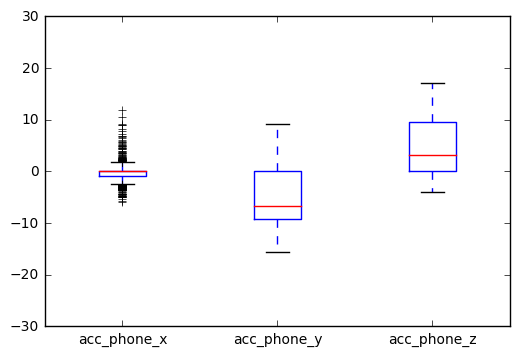

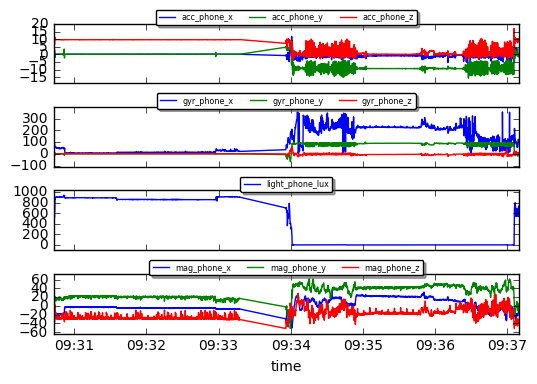

column, fraction missing values, mean, standard deviation, min, max
acc_phone_x 0.0985005170631 -0.2851875 1.16022916969 -5.931874105 11.82735625
acc_phone_y 0.0985005170631 -4.80733303974 4.91407059036 -15.581464625 9.1401043
acc_phone_z 0.0985005170631 4.84125060645 4.64113667166 -4.00612940789 17.0164734211
gyr_phone_x 0.0985005170631 115.235047643 102.897294765 3.26899999 355.879998
gyr_phone_y 0.0985005170631 44.8779827094 44.1744653535 -66.4139986 99.8289981
gyr_phone_z 0.0985005170631 -1.82596176942 6.35443434456 -25.9859996 64.2209991
light_phone_lux 0.250258531541 403.938965517 431.79854745 0.0 937.0
mag_phone_x 0.0985005170631 2.16374529548 13.377553757 -50.53125 34.325
mag_phone_y 0.0985005170631 30.5462745238 14.4169123047 -51.71875 61.54375
mag_phone_z 0.0985005170631 -19.6111519283 11.2617657512 -51.5729166667 28.50625


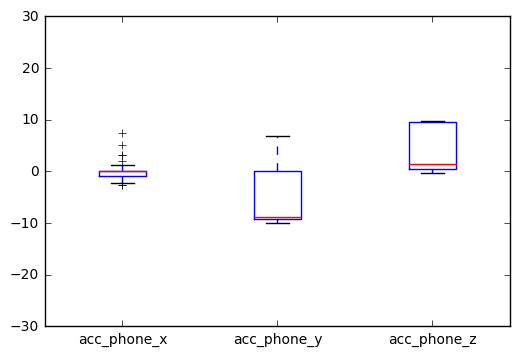

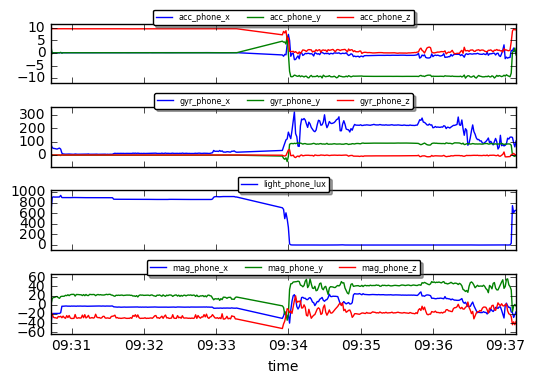

column, fraction missing values, mean, standard deviation, min, max
acc_phone_x 0.0956072351421 -0.287451696079 0.865197778685 -2.65047703065 7.42726972292
acc_phone_y 0.0956072351421 -4.77614057181 4.80221037877 -10.0079546219 6.799341294
acc_phone_z 0.0956072351421 4.85397093201 4.4719407312 -0.372209028791 9.7679599515
gyr_phone_x 0.0956072351421 114.978581502 99.7419807109 5.388799936 323.7787952
gyr_phone_y 0.0956072351421 44.6602123364 43.9652990037 -48.87799928 92.00079832
gyr_phone_z 0.0956072351421 -1.82906547803 5.33514439669 -18.522699766 40.7386994
light_phone_lux 0.0956072351421 405.548157596 431.688455122 0.375 933.777777778
mag_phone_x 0.0956072351421 2.07910979723 13.2896827981 -39.841875 27.88625
mag_phone_y 0.0956072351421 30.4105166637 14.3042016948 -33.600625 56.283125
mag_phone_z 0.0956072351421 -19.7058950569 10.0087482353 -51.5729166667 19.464375


In [15]:

for milliseconds_per_instance in granularities:

    # Create an initial dataset object with the base directory for our data and a granularity
    DataSet = CreateDataset(dataset_path, milliseconds_per_instance)

    # Add the selected measurements to it.

    # We add the accelerometer data (continuous numerical measurements) of the phone and the smartwatch
    # and aggregate the values per timestep by averaging the values/
    DataSet.add_numerical_dataset('accelerometer.csv', 'timestamps', ['x','y','z'], 'avg', 'acc_phone_')
    #DataSet.add_numerical_dataset('accelerometer_smartwatch.csv', 'timestamps', ['x','y','z'], 'avg', 'acc_watch_')

    # We add the gyroscope data (continuous numerical measurements) of the phone and the smartwatch
    # and aggregate the values per timestep by averaging the values/
    DataSet.add_numerical_dataset('gyroscope.csv', 'timestamps', ['x','y','z'], 'avg', 'gyr_phone_')


    # We add the labels provided by the users. These are categorical events that might overlap. We add them
    # as binary attributes (i.e. add a one to the attribute representing the specific value for the label if it
    # occurs within an interval).
    #DataSet.add_event_dataset('labels.csv', 'label_start', 'label_end', 'label', 'binary')

    # We add the amount of light sensed by the phone (continuous numerical measurements) and aggregate by averaging again
    DataSet.add_numerical_dataset('light.csv', 'timestamps', ['lux'], 'avg', 'light_phone_')

    # We add the magnetometer data (continuous numerical measurements) of the phone and the smartwatch
    # and aggregate the values per timestep by averaging the values
    DataSet.add_numerical_dataset('magnetometer.csv', 'timestamps', ['x','y','z'], 'avg', 'mag_phone_')
    ##
    #Normalize
    
    
    
    
    ##

    # Get the resulting pandas data table

    dataset = DataSet.data_table

    # Plot the data

    DataViz = VisualizeDataset()

    # Boxplot
    DataViz.plot_dataset_boxplot(dataset, ['acc_phone_x','acc_phone_y','acc_phone_z'])

    # Plot all data
    DataViz.plot_dataset(dataset, ['acc_', 'gyr_', 'light_phone_lux', 'mag_'], ['like', 'like', 'like', 'like'], ['line', 'line', 'line', 'line'])

    # And print a summary of the dataset

    util.print_statistics(dataset)
    datasets.append(copy.deepcopy(dataset))


In [ ]:

# And print the table that has been included in the book

util.print_latex_table_statistics_two_datasets(datasets[0], datasets[1])

# Finally, store the last dataset we have generated (250 ms).
dataset.to_csv(result_dataset_path + 'chapter2_result.csv')


In [ ]:
#crowdsignals data

In [ ]:

dataset_crowdsignals_path = '../datasets/crowdsignals.io/csv-participant-one/'
result_dataset_crowdsignals_path = './intermediate_datafiles/'

In [3]:
if not os.path.exists(result_dataset_crowdsignals_path):
    print('Creating result directory: ' + result_dataset_crowdsignals_path)
    os.makedirs(result_dataset_crowdsignals_path)


In [9]:

granularities_crowdsignals  = [6000, 10000]
datasets_crowdsignals = []

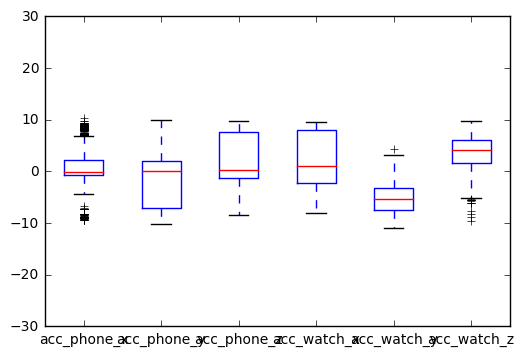

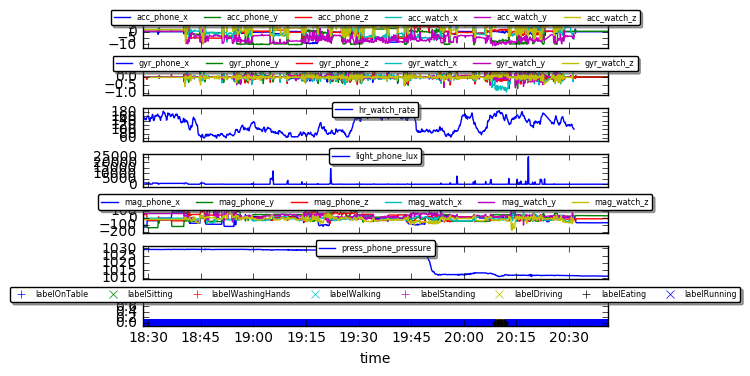

column, fraction missing values, mean, standard deviation, min, max
acc_phone_x 0.0 1.09593363397 4.44288891817 -9.46272125724 10.2504822167
acc_phone_y 0.0 -0.943981235343 6.18114203084 -10.2677615512 9.96904046243
acc_phone_z 0.0 2.00360424658 5.16953586454 -8.45875103391 9.64053432589
acc_watch_x 0.0866616428033 2.07808126786 5.21102005276 -8.07548613861 9.59615585673
acc_watch_y 0.0866616428033 -5.17842667042 2.86229025217 -10.9718144231 4.35261002786
acc_watch_z 0.0866616428033 3.60249492708 3.47094461974 -9.66474081238 9.79996789883
gyr_phone_x 0.0 -0.000500469518437 0.0683202744356 -0.382634408602 0.651757024793
gyr_phone_y 0.0 0.0237698121021 0.118404597714 -0.738261589404 0.800953719008
gyr_phone_z 0.0 -0.00332613071507 0.0974320680794 -0.501052936311 0.775081125828
gyr_watch_x 0.0881688018086 -0.0285217907571 0.169714978071 -0.932227317073 0.615653883972
gyr_watch_y 0.0881688018086 0.00356419555116 0.100854251931 -0.679387656702 0.498663784822
gyr_watch_z 0.0881688018086 -0.0

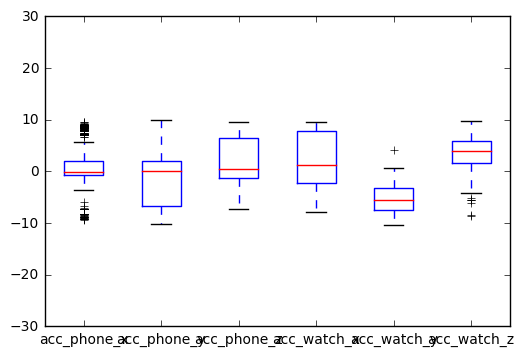

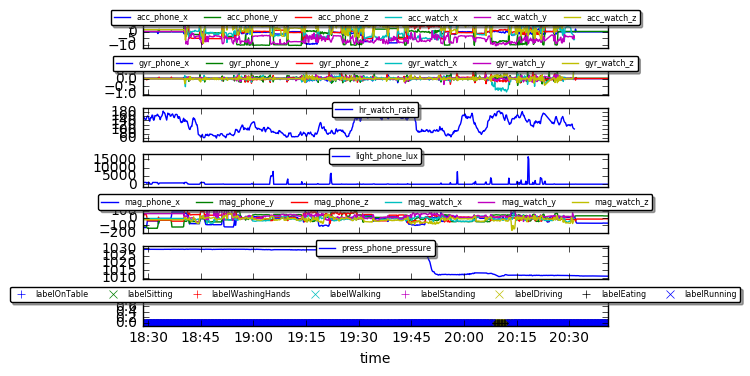

column, fraction missing values, mean, standard deviation, min, max
acc_phone_x 0.0 1.09630261623 4.41522749674 -9.37042750745 9.57865823413
acc_phone_y 0.0 -0.944310255384 6.10674050862 -10.1601883986 9.92209478908
acc_phone_z 0.0 2.00167940733 5.10651917016 -7.31391612903 9.63914746773
acc_watch_x 0.0854271356784 2.0755791739 5.12573128128 -7.94051453488 9.55301638418
acc_watch_y 0.0854271356784 -5.1778255016 2.76463115396 -10.3465205797 4.18406423517
acc_watch_z 0.0854271356784 3.60544126012 3.33762412373 -8.62525395928 9.79455321637
gyr_phone_x 0.0 -0.00049891823468 0.050847334621 -0.27285707196 0.371294146825
gyr_phone_y 0.0 0.0237714496299 0.0888687018241 -0.447515392254 0.512850124069
gyr_phone_z 0.0 -0.00333001246728 0.079438112812 -0.37473101737 0.583159880834
gyr_watch_x 0.0866834170854 -0.0282649867743 0.153377249201 -0.870791958042 0.573087719298
gyr_watch_y 0.0866834170854 0.00366114615254 0.0689820872008 -0.384083287369 0.296594674556
gyr_watch_z 0.0866834170854 -0.002361

In [11]:

for milliseconds_per_instance in granularities_crowdsignals:

    # Create an initial dataset object with the base directory for our data and a granularity
    DataSet = CreateDataset(dataset_crowdsignals_path, milliseconds_per_instance)

    # Add the selected measurements to it.

    # We add the accelerometer data (continuous numerical measurements) of the phone and the smartwatch
    # and aggregate the values per timestep by averaging the values/
    DataSet.add_numerical_dataset('accelerometer_phone.csv', 'timestamps', ['x','y','z'], 'avg', 'acc_phone_')
    DataSet.add_numerical_dataset('accelerometer_smartwatch.csv', 'timestamps', ['x','y','z'], 'avg', 'acc_watch_')

    # We add the gyroscope data (continuous numerical measurements) of the phone and the smartwatch
    # and aggregate the values per timestep by averaging the values/
    DataSet.add_numerical_dataset('gyroscope_phone.csv', 'timestamps', ['x','y','z'], 'avg', 'gyr_phone_')
    DataSet.add_numerical_dataset('gyroscope_smartwatch.csv', 'timestamps', ['x','y','z'], 'avg', 'gyr_watch_')

    # We add the heart rate (continuous numerical measurements) and aggregate by averaging again
    DataSet.add_numerical_dataset('heart_rate_smartwatch.csv', 'timestamps', ['rate'], 'avg', 'hr_watch_')

    # We add the labels provided by the users. These are categorical events that might overlap. We add them
    # as binary attributes (i.e. add a one to the attribute representing the specific value for the label if it
    # occurs within an interval).
    DataSet.add_event_dataset('labels.csv', 'label_start', 'label_end', 'label', 'binary')

    # We add the amount of light sensed by the phone (continuous numerical measurements) and aggregate by averaging again
    DataSet.add_numerical_dataset('light_phone.csv', 'timestamps', ['lux'], 'avg', 'light_phone_')

    # We add the magnetometer data (continuous numerical measurements) of the phone and the smartwatch
    # and aggregate the values per timestep by averaging the values
    DataSet.add_numerical_dataset('magnetometer_phone.csv', 'timestamps', ['x','y','z'], 'avg', 'mag_phone_')
    DataSet.add_numerical_dataset('magnetometer_smartwatch.csv', 'timestamps', ['x','y','z'], 'avg', 'mag_watch_')

    # We add the pressure sensed by the phone (continuous numerical measurements) and aggregate by averaging again
    DataSet.add_numerical_dataset('pressure_phone.csv', 'timestamps', ['pressure'], 'avg', 'press_phone_')

    # Get the resulting pandas data table

    datasets_crowdsignals = DataSet.data_table

    # Plot the data

    DataViz = VisualizeDataset()

    # Boxplot
    DataViz.plot_dataset_boxplot(datasets_crowdsignals, ['acc_phone_x','acc_phone_y','acc_phone_z','acc_watch_x','acc_watch_y','acc_watch_z'])

    # Plot all data
    DataViz.plot_dataset(datasets_crowdsignals, ['acc_', 'gyr_', 'hr_watch_rate', 'light_phone_lux', 'mag_', 'press_phone_', 'label'], ['like', 'like', 'like', 'like', 'like', 'like', 'like','like'], ['line', 'line', 'line', 'line', 'line', 'line', 'points', 'points'])

    # And print a summary of the dataset

    util.print_statistics(datasets_crowdsignals)
    datasets_crowdsignals.append(copy.deepcopy(datasets_crowdsignals))


,acc_phone_x,acc_phone_y,acc_phone_z,acc_watch_x,acc_watch_y,acc_watch_z,gyr_phone_x,gyr_phone_y,gyr_phone_z,gyr_watch_x,...,labelEating,labelRunning,light_phone_lux,mag_phone_x,mag_phone_y,mag_phone_z,mag_watch_x,mag_watch_y,mag_watch_z,press_phone_pressure
2016-02-08 18:28:25.656222395,-0.088762,0.167573,9.62802,9.551023,0.198312,1.509380,-0.008865,0.018668,-0.001358,0.001921,...,0,0,1083.543478,-76.242371,-140.824802,-28.700912,-6.393810,59.255069,-23.494130,1029.257851
2016-02-08 18:28:35.656222395,-0.0926294,0.122802,9.62093,9.551275,0.199357,1.511878,-0.009381,0.018784,0.020303,0.001906,...,0,0,1094.978723,-106.790838,-121.477246,14.705269,-6.438919,59.258378,-23.458378,1029.290340
2016-02-08 18:28:45.656222395,-0.0715992,0.11175,9.6183,9.552130,0.199040,1.509377,-0.008441,0.018921,-0.000217,0.001914,...,0,0,1104.125000,-129.300060,-106.372291,47.514920,-6.324034,59.155579,-23.462446,1029.241688
2016-02-08 18:28:55.656222395,-0.0714005,0.113436,9.61959,9.550164,0.199136,1.511807,-0.008477,0.018864,0.000059,0.001954,...,0,0,1104.063830,-130.191317,-107.347784,47.446048,-6.328738,59.258749,-23.465536,1029.227340
2016-02-08 18:29:05.656222395,-0.0704355,0.11313,9.61957,9.550933,0.198632,1.514947,-0.008538,0.018549,0.000416,0.001895,...,0,0,1103.354167,-129.550409,-107.212582,47.645324,-6.375398,59.380700,-23.313892,1029.281875
